In [ ]:
#라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix

import seaborn as sns
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import platform
pd.set_option('display.max_rows', None)

#한글 깨짐 방지
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    rc('font', family='AppleGothic')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/dataset_final의 사본1.csv', encoding='utf-8', index_col=0)
df.head()

,행정동_코드,행정동명,상권_구분_코드,상권_코드,상권_코드_명,분기당_매출_금액,분기당_매출_건수,건당_매출액_평균,"환산임대료(원, 21년도)","증감율(%, 19-21년도)",...,프랜차이즈 비율,2021년_2030여성_비율평균,2021년_외국인_평균,문화시설수,지하철_역_수,버스_정거장_수,전체_카페_점포_수,개인카페_점포수,개인카페_비율,활성화_여부
614,11440660,서교동,D,2120103,홍대입구역(홍대),5.463269e+09,345268.5000,15823.246520,149801,6.505,...,0.119495,0.0748,1865.8627,36,5,86,292,242,0.8288,0
615,11440660,서교동,D,2120104,연남동(홍대),4.185808e+09,266968.9167,15679.007870,149801,6.505,...,0.119495,0.0748,1865.8627,36,5,86,242,223,0.9215,0
789,11545510,가산동,D,2120131,가산디지털단지,8.802862e+09,975844.3889,9020.764397,114290,6.200,...,0.309524,0.0547,644.1717,1,2,97,279,151,0.5412,0
986,11650520,서초2동,D,2120189,강남역,1.178592e+10,904123.2500,13035.744940,150037,1.699,...,0.246984,0.0550,416.5434,4,4,51,278,140,0.5036,0
1180,11710642,문정2동,D,2120235,문정역,3.339812e+09,283060.1944,11798.946520,154183,11.267,...,0.253086,0.0528,202.7369,1,2,9,182,132,0.7253,0


In [ ]:
#데이터 형태 및 타입 확인
print('dataset shape: ', df.shape)
print(df.info()) 

dataset shape:  (1241, 29)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241 entries, 0 to 1240
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   행정동_코드             1241 non-null   int64  
 1   행정동명               1241 non-null   object 
 2   상권_구분_코드           1241 non-null   object 
 3   상권_코드              1241 non-null   int64  
 4   상권_코드_명            1241 non-null   object 
 5   분기당_매출_금액          1241 non-null   float64
 6   분기당_매출_건수          1241 non-null   float64
 7   건당_매출액_평균          1241 non-null   float64
 8   환산임대료(원, 21년도)     1241 non-null   int64  
 9   증감율(%, 19-21년도)    1241 non-null   float64
 10  임대료/매출             1241 non-null   float64
 11  매출/임대료             1241 non-null   float64
 12  점포수                1241 non-null   int64  
 13  면적                 1241 non-null   float64
 14  단위면적당 점포 수(k㎡)     1241 non-null   float64
 15  프랜차이즈_점포_수         1241 non-null   int64  
 1

In [ ]:
#식별자 컬럼 제거
df.drop(['행정동_코드', '행정동명', '상권_구분_코드', '상권_코드', '상권_코드_명'], axis=1, inplace=True)

KeyError: ignored

In [ ]:
X_features = df.iloc[:,5:-3]
y_label = df['활성화_여부']

# **!!! 변수선택**

In [ ]:
from sklearn.feature_selection import SelectKBest,f_classif, mutual_info_classif

sb = SelectKBest(score_func=f_classif) # F통계량이 큰 순서대로 10개 선택
X_new = sb.fit_transform(X_features_st,y_label)
X_new.shape 
res = sb.get_support()
print(np.where(res == True)) #선택된 변수 인덱스 반환

(array([ 0,  1,  3,  7, 10, 11, 13, 14, 16, 18]),)


In [ ]:
# 선택된 10개의 변수
X_features = df[["분기당_매출_금액","분기당_매출_건수","환산임대료(원, 21년도)","개인사업자_수","점포수","프랜차이즈_점포_수",
                   "2021년_2030여성_비율평균","지하철_역_수","전체_카페_점포_수","개인카페_점포수"]]

In [ ]:
X_features_st.head()

AttributeError: ignored

# **데이터셋 분리(학습/시험)**

In [ ]:
#정규화 : 이상치가 있는 경우X ,이 외의 경우는 괜찮음 
mm_scaler = MinMaxScaler()
X_features_mm = mm_scaler.fit_transform(X_features)


In [ ]:
#표준화 : 특성자료의 분포가 종모양이거나 이상치가 있는 경우

st_scaler = StandardScaler()
X_features_st = st_scaler.fit_transform(X_features)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_over,y_train_over,
                                   test_size = 0.3,
                                   random_state = 102)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(1766, 19), 테스트 세트 Shape:(757, 19)
 학습 세트 레이블 값 분포 비율
0    0.336353
2    0.333522
1    0.330125
Name: 활성화_여부, dtype: float64

 테스트 세트 레이블 값 분포 비율
1    0.340819
2    0.332893
0    0.326288
Name: 활성화_여부, dtype: float64


# **!!! 클래스 불균형 처리**

2    821
1    301
0    119
Name: 활성화_여부, dtype: int64


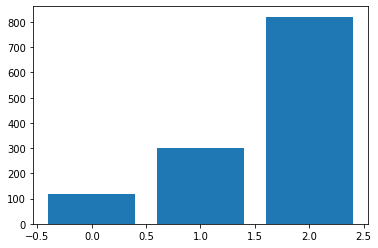

In [ ]:
# 클래스 확인 
print(df["활성화_여부"].value_counts())

x_label = list(i for i in df["활성화_여부"].unique())
y_count = list(count for count in df["활성화_여부"].value_counts()[x_label])
plt.bar(x_label, y_count)
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=101)

X_train_over, y_train_over = smote.fit_resample(X_features, y_label)

counter = Counter(y_train_over)
for k,v in counter.items():
	per = v / len(y_train_over) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

    
print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ", X_features.shape, y_label.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 값의 분포 :\n',pd.Series(y_train_over).value_counts() )   

Class=0, n=841 (33.333%)
Class=1, n=841 (33.333%)
Class=2, n=841 (33.333%)
SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (1241, 19) (1241,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : (2523, 19) (2523,)
SMOTE 적용 후 값의 분포 :
 0    841
1    841
2    841
Name: 활성화_여부, dtype: int64


# **KNN**

In [ ]:
#z점수 정규화_SMOTE+Tomek
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from imblearn.combine import *

In [ ]:
df = pd.read_excel('dataset_final의 사본1.xlsx')

In [ ]:
df_data = df.iloc[:,1:]
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241 entries, 0 to 1240
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   행정동_코드             1241 non-null   float64
 1   행정동명               1241 non-null   object 
 2   상권_구분_코드           1241 non-null   object 
 3   상권_코드              1241 non-null   float64
 4   상권_코드_명            1241 non-null   object 
 5   분기당_매출_금액          1241 non-null   float64
 6   분기당_매출_건수          1241 non-null   float64
 7   건당_매출액_평균          1241 non-null   float64
 8   환산임대료(원, 21년도)     1241 non-null   float64
 9   증감율(%, 19-21년도)    1241 non-null   float64
 10  임대료/매출             1241 non-null   float64
 11  매출/임대료             1241 non-null   float64
 12  점포수                1241 non-null   float64
 13  면적                 1241 non-null   float64
 14  단위면적당 점포 수(k㎡)     1241 non-null   float64
 15  프랜차이즈_점포_수         1241 non-null   float64
 16  개인사업자_수            1241 

In [ ]:
del df_data['행정동_코드']
del df_data['행정동명']
del df_data['상권_구분_코드']
del df_data['상권_코드_명']
del df_data['활성화_여부']
del df_data['상권_코드']
del df_data['개인카페_비율']

In [ ]:
df_labels = df[['상권_코드','활성화_여부']]

In [ ]:
del df_labels['상권_코드']

In [ ]:
#z점수 정규화 함수
def z_score_normalize(lst):
    normalized = []
    for value in lst:
        normalized_num = (value - np.mean(lst)) / np.std(lst)
        normalized.append(normalized_num)
    return normalized
#z-점수 정규화

In [ ]:
for x in df_data.columns:
    df_data[x] = z_score_normalize(df_data[x])
df_data.describe()
#Z-Score Normalization (Z-점수 정규화)

,분기당_매출_금액,분기당_매출_건수,건당_매출액_평균,"환산임대료(원, 21년도)","증감율(%, 19-21년도)",임대료/매출,매출/임대료,점포수,면적,단위면적당 점포 수(k㎡),프랜차이즈_점포_수,개인사업자_수,프랜차이즈 비율,2021년_2030여성_비율평균,2021년_외국인_평균,문화시설수,지하철_역_수,버스_정거장_수,전체_카페_점포_수,개인카페_점포수
count,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1241.000000
mean,1.145113e-16,-4.580453e-17,-3.435340e-17,-2.290226e-17,1.717670e-17,8.588349e-17,-9.160906e-17,-5.725566e-17,-2.290226e-17,-1.374136e-16,9.160906e-17,-6.870679e-17,-2.655231e-16,2.519249e-16,9.160906e-17,-1.145113e-17,2.290226e-17,8.015792e-17,9.160906e-17,0.000000
std,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403
min,-6.080524e-01,-6.226109e-01,-9.315040e-01,-1.725554e+00,-4.460054e+00,-2.020763e+00,-1.156296e+00,-1.132454e+00,-8.133299e-01,-1.429697e+00,-8.612213e-01,-8.262742e-01,-3.272101e+00,-1.975003e+00,-7.526297e-01,-4.077382e-01,-7.369904e-01,-1.342815e+00,-6.098329e-01,-0.642858
25%,-4.338781e-01,-4.441613e-01,-4.281759e-01,-6.517650e-01,-6.055894e-01,-6.445839e-01,-5.087340e-01,-5.734219e-01,-4.960873e-01,-6.615489e-01,-6.033715e-01,-5.595913e-01,-6.437550e-01,-7.389493e-01,-5.775542e-01,-4.077382e-01,-7.369904e-01,-7.117496e-01,-4.704072e-01,-0.489575
50%,-2.964842e-01,-2.814515e-01,-2.297024e-01,-1.917295e-01,-1.005662e-01,-1.001195e-01,-2.570169e-01,-2.775377e-01,-2.963420e-01,-1.889726e-01,-3.572422e-01,-3.295119e-01,-5.809097e-02,-2.078324e-01,-3.701093e-01,-3.171540e-01,-7.369904e-01,-2.209209e-01,-2.961251e-01,-0.285198
75%,-3.341357e-02,1.004945e-03,5.649667e-02,4.031393e-01,5.113908e-01,4.805693e-01,1.530383e-01,2.172814e-01,5.027480e-02,3.832172e-01,2.287801e-01,1.515632e-01,5.518459e-01,6.033279e-01,1.772337e-01,-4.540156e-02,1.028673e-01,4.101445e-01,-1.727373e-02,0.072463
max,1.175551e+01,1.330984e+01,1.985365e+01,7.893882e+00,6.063762e+00,7.402615e+00,1.479729e+01,5.607410e+00,6.500873e+00,5.568583e+00,4.178570e+00,5.900933e+00,3.757484e+00,3.732089e+00,5.458080e+00,9.918855e+00,4.302156e+00,5.458668e+00,9.568243e+00,11.721971


In [ ]:
#샘플링
smotetomek = SMOTETomek(random_state=101)
X_train_over, y_train_over = smotetomek.fit_resample(df_data, df_labels)

In [ ]:
#샘플링 결과 확인
print("SMOTETomek 적용 전 학습용 피처/레이블 데이터 세트 : ", df_data.shape, df_labels.shape)
print('SMOTETomek 적용 후 학습용 피처/레이블 데이터 세트 :', X_train_over.shape, y_train_over.shape)

SMOTETomek 적용 전 학습용 피처/레이블 데이터 세트 :  (1241, 20) (1241, 1)
SMOTETomek 적용 후 학습용 피처/레이블 데이터 세트 : (2451, 20) (2451, 1)


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241 entries, 0 to 1240
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   분기당_매출_금액          1241 non-null   float64
 1   분기당_매출_건수          1241 non-null   float64
 2   건당_매출액_평균          1241 non-null   float64
 3   환산임대료(원, 21년도)     1241 non-null   float64
 4   증감율(%, 19-21년도)    1241 non-null   float64
 5   임대료/매출             1241 non-null   float64
 6   매출/임대료             1241 non-null   float64
 7   점포수                1241 non-null   float64
 8   면적                 1241 non-null   float64
 9   단위면적당 점포 수(k㎡)     1241 non-null   float64
 10  프랜차이즈_점포_수         1241 non-null   float64
 11  개인사업자_수            1241 non-null   float64
 12  프랜차이즈 비율           1241 non-null   float64
 13  2021년_2030여성_비율평균  1241 non-null   float64
 14  2021년_외국인_평균       1241 non-null   float64
 15  문화시설수              1241 non-null   float64
 16  지하철_역_수            1241 

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 1, f1: 89.54
rdst: 101, k: 2, f1: 84.38
rdst: 101, k: 3, f1: 85.46


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 4, f1: 82.74


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 5, f1: 83.83


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 6, f1: 81.66


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 7, f1: 82.88


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 8, f1: 81.52


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 9, f1: 82.88


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 10, f1: 80.30


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 11, f1: 81.93


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 12, f1: 79.35


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 13, f1: 80.16


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 14, f1: 79.89


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 15, f1: 80.30


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 16, f1: 78.53


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 17, f1: 79.48


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 18, f1: 78.12


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 19, f1: 77.72


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 20, f1: 77.04


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 21, f1: 76.63


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 22, f1: 75.95


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 23, f1: 75.54


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 24, f1: 75.68


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 25, f1: 75.68


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 26, f1: 74.59


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 27, f1: 75.27


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 28, f1: 75.27


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 29, f1: 73.23


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 30, f1: 73.10


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 31, f1: 72.83


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 32, f1: 72.83


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 33, f1: 72.69


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 34, f1: 73.10


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 35, f1: 72.69


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 36, f1: 72.42


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 37, f1: 72.28


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 38, f1: 71.88


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 39, f1: 71.74


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 40, f1: 71.88


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 41, f1: 72.15


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 42, f1: 71.47


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 43, f1: 71.74


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 44, f1: 71.47


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 45, f1: 71.74


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 46, f1: 72.42


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 47, f1: 72.01


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 48, f1: 71.88


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


rdst: 101, k: 49, f1: 72.01


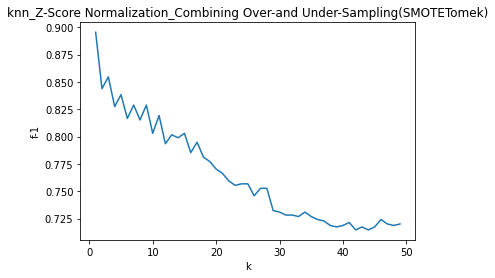

In [ ]:
#k값에 따른 정확도 비교 
k_list = range(1,50)
accuracies = []
for i in range(1):
    rds = 101
    training_data, validation_data , training_labels, validation_labels = train_test_split(X_train_over, y_train_over, test_size = 0.3, random_state = rds)
    for k in range(1, 50):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(training_data, training_labels)
    #   score = knn.score(validation_data, validation_labels)
        y_pred = knn.predict(validation_data)
        y_train_pred = knn.predict(training_data)
        
        f1 = f1_score(validation_labels, y_pred, average = 'micro')
        print('rdst: %d, k: %d, f1: %.2f' % (rds, k,f1*100))
        accuracies.append(f1_score(validation_labels, y_pred, average = 'micro'))
    #     print(classification_report(validation_labels, y_pred))
    #     print(confusion_matrix(validation_labels, y_pred))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("f-1")
plt.title("knn_Z-Score Normalization_Combining Over-and Under-Sampling(SMOTETomek)")
plt.show() 


In [ ]:
print(f1_score(validation_labels,y_pred, average='micro'))

ValueError: ignored

In [ ]:
print(classification_report(validation_labels, y_pred))



              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       247
         1.0       0.61      0.63      0.62       254
         2.0       0.63      0.53      0.58       235

    accuracy                           0.72       736
   macro avg       0.71      0.72      0.71       736
weighted avg       0.71      0.72      0.71       736



k는?: 4


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


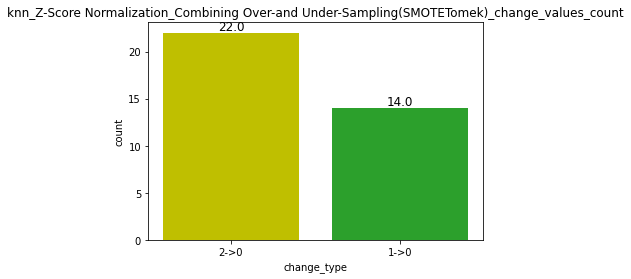

k: 4, f1_score: 70.59
[[ 99   0   0]
 [ 14 267  20]
 [ 22 309 510]]


In [ ]:
#k값에따른 기존 데이터셋 예측 및 1->0, 2->0 결과 시각화
if len(df.columns) != 28:
    del df['new_labels']

k = int(input('k는?: '))
rds = 3
training_data, validation_data , training_labels, validation_labels = train_test_split(X_train_over, y_train_over, test_size = 0.3, random_state = rds)
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(training_data, training_labels)
y_pred = knn.predict(df_data)
df['new_labels'] = y_pred
df_change = df[df['활성화_여부'] != df['new_labels']]
df_chage_to_0 = df_change[df_change['new_labels'] == 0]
x = np.arange(2)
change_type = ['2->0', '1->0']
values = [len(df_chage_to_0[df_chage_to_0['활성화_여부'] == 2]), len(df_chage_to_0[df_chage_to_0['활성화_여부'] == 1])]

plt.bar(x, values)
plt.xticks(x, change_type)
plt.xlabel("change_type")
plt.ylabel("count")
plt.title("knn_Z-Score Normalization_Combining Over-and Under-Sampling(SMOTETomek)_change_values_count")
colors = ['y', 'C2']

bar = plt.bar(x, values, color=colors)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)

plt.show()
print('k: %d, f1_score: %.2f' % (k, f1_score(df_labels, y_pred, average = 'micro') * 100))
print(confusion_matrix(df_labels, y_pred))

In [ ]:
#초모수/교차검증 해보긴했는데...
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

inner_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=11)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=11)
test_knn = KNeighborsClassifier()
k_range = list(range(1,50,2))  
leaf_range = list(range(10,51,10))
param_grid = [{'n_neighbors': k_range, 'leaf_size': leaf_range,
             'weights':['uniform','distance']}]

gs = GridSearchCV(estimator=test_knn, param_grid=param_grid, scoring='f1_micro', cv=inner_cv)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.7557738572574177
{'leaf_size': 10, 'n_neighbors': 15, 'weights': 'distance'}


In [ ]:
test2_knn = KNeighborsClassifier(leaf_size=10, n_neighbors=15, weights='uniform')
test2_knn.fit(X_features_st,y_label)
y_pred = test2_knn.predict(X_features_st)
print('f1_score :', f1_score(y_label, y_pred, average='micro'))
print(confusion_matrix(y_label, y_pred)) #
#교차검증(성능 일반화)
scores = cross_val_score(test2_knn, X_features_st, y_label, scoring='f1_micro', cv=outer_cv)
print(scores)
print(np.mean(scores))

f1_score : 0.7590652699435939
[[ 97  10  12]
 [  5  62 234]
 [  1  37 783]]
[0.7751004  0.74193548 0.70967742 0.7016129  0.75      ]
0.7356652416116078


In [ ]:
map_test = df.copy()
map_test.insert(27,'y_pred',y_pred)
ind = np.where(map_test['활성화_여부'] > map_test['y_pred'])


[array([ 148,  150,  152,  172,  226,  425,  426,  431,  432,  440,  444,
         448,  449,  454,  457,  465,  470,  474,  476,  491,  501,  507,
         508,  528,  543,  553,  559,  560,  583,  602,  611,  633,  648,
         649,  676,  706,  840,  863,  866,  932, 1056, 1123, 1219])]

In [ ]:
map_test[['행정동명','상권_코드','상권_코드_명','활성화_여부','y_pred']].iloc[[150]]

,행정동명,상권_코드,상권_코드_명,활성화_여부,y_pred
1030,양재1동,2110939,양재역 8번(양재동우체국),1,0


# **다항로지스틱회귀분석**

In [ ]:
logistic = LogisticRegression(multi_class='multinomial', solver='sag')
logistic.fit(X_train_over, y_train_over) #smote 기법 적용하면 test f1이 너무 떨어짐
mlg_y_train_pred = logistic.predict(X_train_over)
mlg_y_test_pred = logistic.predict(X_test)

print('train acc :',accuracy_score(y_train, mlg_y_train_pred)) 
print('test acc :',accuracy_score(y_test, mlg_y_test_pred)) 
print('train f1_score :', f1_score(y_train, mlg_y_train_pred, average='micro'))
print('test f1_score :', f1_score(y_test, mlg_y_test_pred, average='micro'),"\n")

print(confusion_matrix(y_test, mlg_y_test_pred))
print(classification_report(y_test, mlg_y_test_pred))

NameError: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score



# **의사결정나무**

In [ ]:
Dtree = tree.DecisionTreeClassifier(max_depth=2)
Dtree.fit(X_train, y_train)
tree_y_train_pred = Dtree.predict(X_train) 
tree_y_test_pred = Dtree.predict(X_test)


print('train acc :',accuracy_score(y_train, tree_y_train_pred))
print('test acc :',accuracy_score(y_test, tree_y_test_pred))

print('train f1_score :', f1_score(y_train, tree_y_train_pred, average='micro'))
print('test f1_score :', f1_score(y_test, tree_y_test_pred, average='micro'))

print(confusion_matrix(y_test, tree_y_test_pred))
print(classification_report(y_test, tree_y_test_pred))

train acc : 0.7197055492638732
test acc : 0.7120211360634082
train f1_score : 0.7197055492638732
test f1_score : 0.7120211360634082
[[230  17   0]
 [  7 227  24]
 [  2 168  82]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       247
           1       0.55      0.88      0.68       258
           2       0.77      0.33      0.46       252

    accuracy                           0.71       757
   macro avg       0.76      0.71      0.69       757
weighted avg       0.76      0.71      0.69       757



# **XGBoost**

In [ ]:
XGB_model = XGBClassifier()

XGB_model.fit(X_train, y_train) 
xg_y_train_pred = XGB_model.predict(X_train) 
xg_y_test_pred = XGB_model.predict(X_test) 

print('train acc :',accuracy_score(y_train, xg_y_train_pred))
print('test acc :',accuracy_score(y_test, xg_y_test_pred))

print('train f1_score :', f1_score(y_train, xg_y_train_pred, average='micro'))
print('test f1_score :', f1_score(y_test, xg_y_test_pred, average='micro')) 

print(confusion_matrix(y_test, xg_y_test_pred)) 
print(classification_report(y_test, xg_y_test_pred))

train acc : 0.9065685164212911
test acc : 0.7886393659180978
train f1_score : 0.9065685164212911
test f1_score : 0.7886393659180978
[[244   3   0]
 [  8 190  60]
 [  7  82 163]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       247
           1       0.69      0.74      0.71       258
           2       0.73      0.65      0.69       252

    accuracy                           0.79       757
   macro avg       0.79      0.79      0.79       757
weighted avg       0.79      0.79      0.79       757

